# ImageDataGenerator

In [1]:
import os
from glob import glob

import tensorflow as tf
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

### ImageDataGenerator 

 - 데이터를 불러오는 동시에 여러가지 전처리를 쉽게 구현 할 수 있는 tf.keras의 기능으로 `tf.data.API`보다 더 편리함

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
datagen = ImageDataGenerator(
    # 아래의 작업을 랜덤하게 적용 또는 적용 X
    rotation_range=20, # 20도 각도 내에서 회전
    width_shift_range=0.2, # 가로로 이동
    height_shift_range=0.2, # 세로로 이동
    horizontal_flip=True) # 가로축 반전

# data augmentation -> overfitting 방지

### flow

- 데이터를 모두 메모리에 불러두고 사용 할 때

In [4]:
class Cifar10DataLoader():
    def __init__(self):
        # data load
        (self.train_x, self.train_y), \
            (self.test_x, self.test_y) = tf.keras.datasets.cifar10.load_data()
        self.input_shape = self.train_x.shape[1:]

    def scale(self, x):

        return (x / 255.0).astype(np.float32)

    def preprocess_dataset(self, dataset):

        (feature, target) = dataset

        # scaling #
        scaled_x = np.array([self.scale(x) for x in feature])

        # label encoding #
        ohe_y = np.array([tf.keras.utils.to_categorical(
            y, num_classes=10) for y in target])
        
        return scaled_x, ohe_y.squeeze(1)

    def get_train_dataset(self):
        return self.preprocess_dataset((self.train_x, self.train_y))

    def get_test_dataset(self):
        return self.preprocess_dataset((self.test_x, self.test_y))

cifar10_loader = Cifar10DataLoader()
train_x, train_y = cifar10_loader.get_train_dataset()

print(train_x.shape, train_x.dtype)
print(train_y.shape, train_y.dtype)

(50000, 32, 32, 3) float32
(50000, 10) float32


In [5]:
next(iter(datagen.flow((train_x, train_y))))

[array([[[[0.7764706 , 0.82374567, 0.9217849 ],
          [0.7764706 , 0.8315401 , 0.9292442 ],
          [0.77694595, 0.83951277, 0.9218657 ],
          ...,
          [0.787903  , 0.80751085, 0.8780991 ],
          [0.77111775, 0.7874266 , 0.8547158 ],
          [0.76862746, 0.78431374, 0.8509804 ]],
 
         [[0.77679884, 0.8235294 , 0.9202556 ],
          [0.7764706 , 0.8306673 , 0.9287065 ],
          [0.7764706 , 0.83846176, 0.9223226 ],
          ...,
          [0.7905214 , 0.8101292 , 0.88071746],
          [0.7728633 , 0.78960854, 0.85733414],
          [0.76862746, 0.78431374, 0.8509804 ]],
 
         [[0.77723527, 0.8235294 , 0.91851   ],
          [0.7764706 , 0.8297945 , 0.92783374],
          [0.7764706 , 0.83758897, 0.92319536],
          ...,
          [0.7850125 , 0.8046203 , 0.8781637 ],
          [0.76782584, 0.78710574, 0.8544627 ],
          [0.76097167, 0.7804858 , 0.8433246 ]],
 
         ...,
 
         [[0.8790292 , 0.8249363 , 0.6109557 ],
          [0.88164

In [6]:
# 이코드를 여러번 실행해보면서 바뀌는 걸 한번 보세요! 데이터가 바뀌어서 출력되지요? 
result = next(iter(datagen.flow((train_x, train_y))))

x, y = result
x.shape, y.shape

((32, 32, 32, 3), (32, 10))

0.00065921387 1.0 0.49425578
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


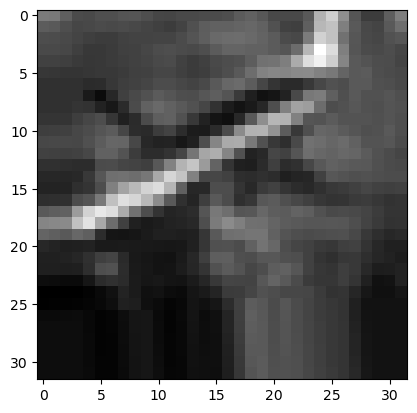

In [7]:
# print(np.min(result), np.max(result), np.mean(result))
print(np.min(x), np.max(x), np.mean(x))
print(y[0])

plt.imshow(x[0, :, :, 0], 'gray')
plt.show()

### flow_from_directory 

데이터가 너무 커서 하나씩 불러와야할때

In [8]:
train_dir = "../../datasets/mnist_png/training"
os.listdir(train_dir) # 분류 문제나, 클래스가 아래와 같이 구분되어있는 경우에 사용 가능

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [9]:
os.listdir(train_dir + '/0') 
# 또한, 해당 이미지들의 클래스가 해당 폴더 아래에 있는 데이터의 경우
# flow_from_directory를 이용할 수 있다 

['1.png',
 '1000.png',
 '10005.png',
 '10010.png',
 '10022.png',
 '10025.png',
 '10026.png',
 '10045.png',
 '10069.png',
 '10071.png',
 '10080.png',
 '10083.png',
 '10107.png',
 '10119.png',
 '10120.png',
 '10121.png',
 '10128.png',
 '10140.png',
 '1015.png',
 '10167.png',
 '10168.png',
 '10176.png',
 '1018.png',
 '10188.png',
 '10195.png',
 '10203.png',
 '10204.png',
 '10221.png',
 '10230.png',
 '10237.png',
 '10240.png',
 '10242.png',
 '10245.png',
 '10254.png',
 '10259.png',
 '10261.png',
 '10265.png',
 '10272.png',
 '10276.png',
 '1028.png',
 '10283.png',
 '1029.png',
 '10323.png',
 '10326.png',
 '10334.png',
 '10340.png',
 '10343.png',
 '10348.png',
 '10352.png',
 '10363.png',
 '10366.png',
 '10372.png',
 '10380.png',
 '10384.png',
 '1040.png',
 '10407.png',
 '10425.png',
 '10439.png',
 '10456.png',
 '1046.png',
 '10469.png',
 '10471.png',
 '10479.png',
 '10488.png',
 '1049.png',
 '10505.png',
 '10523.png',
 '10530.png',
 '10531.png',
 '10542.png',
 '10563.png',
 '10564.png',
 '10

In [13]:
input_shape = (28, 28, 1)
batch_size = 32

gen =  datagen.flow_from_directory(
    train_dir,
    target_size = input_shape[:2] , # 입력데이터를 어떤 사이즈로 줄여줄지
    batch_size = batch_size,
    color_mode = 'grayscale' # 채널 설정
)

Found 60000 images belonging to 10 classes.


In [14]:
x , y = next(iter(gen))

In [15]:
x.shape, y.shape

((32, 28, 28, 1), (32, 10))

### flow_from_DataFrame

In [16]:
import pandas as pd

In [17]:
train_data = pd.read_csv("../../datasets/cifar/train_dataset.csv")
train_data

,path,class_name
0,../../datasets/cifar/train/32270_deer.png,deer
1,../../datasets/cifar/train/21851_cat.png,cat
2,../../datasets/cifar/train/48309_deer.png,deer
3,../../datasets/cifar/train/33547_truck.png,truck
4,../../datasets/cifar/train/45202_automobile.png,automobile
...,...,...
49995,../../datasets/cifar/train/24599_horse.png,horse
49996,../../datasets/cifar/train/38514_automobile.png,automobile
49997,../../datasets/cifar/train/20054_deer.png,deer
49998,../../datasets/cifar/train/25602_bird.png,bird


레이블의 자유도가 flow_from_directory보다 자유로우며 메모리를 더 적게 씀

In [19]:
gen = datagen.flow_from_dataframe(
    train_data,
    x_col="path",
    y_col="class_name",
    target_size=(32, 32), # input_size
    color_mode="rgb", # 채널 수
    class_model="categorical", 
    batch_size=32
)

Found 50000 validated image filenames belonging to 10 classes.


In [20]:
x, y = next(iter(gen))

In [21]:
x.shape, y.shape

((32, 32, 32, 3), (32, 10))

학습시켜보겠습니다. 

In [22]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Add

def build_resnet(input_shape):
    inputs = Input(input_shape)

    net = Conv2D(32, kernel_size=3, strides=2,
                 padding='same', activation='relu')(inputs)
    net = MaxPool2D()(net)
    
    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)
    
    net1_1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net = Add()([net1_1, net3])
    
    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)
    
    net = Add()([net, net3])
    
    net = MaxPool2D()(net)
    
    net = Flatten()(net)
    net = Dense(10, activation="softmax")(net)

    model = tf.keras.Model(inputs=inputs, outputs=net, name='resnet')
    
    return model

model = build_resnet((32, 32, 3))
model.summary()

Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 16, 16, 32)           896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)             0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 8, 8, 64)             2112      ['max_pooling2d[0][0]']  

In [23]:
learning_rate = 0.03
opt = tf.keras.optimizers.Adam(learning_rate)
loss = tf.keras.losses.categorical_crossentropy

model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

In [26]:
model.fit(gen)

1563/1563 [==============================] - 110s 70ms/step - loss: 2.7374 - accuracy: 0.0995
